In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# PREDICT THE BURNED AREA OF FOREST FIRES WITH SVM
data=pd.read_csv('forestfires.csv')
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
data.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


In [4]:
data.shape

(517, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [7]:
data.nunique()

month             12
day                7
FFMC             106
DMC              215
DC               219
ISI              119
temp             192
RH                75
wind              21
rain               7
area             251
dayfri             2
daymon             2
daysat             2
daysun             2
daythu             2
daytue             2
daywed             2
monthapr           2
monthaug           2
monthdec           2
monthfeb           2
monthjan           2
monthjul           2
monthjun           2
monthmar           2
monthmay           2
monthnov           2
monthoct           2
monthsep           2
size_category      2
dtype: int64

In [8]:
data['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [9]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

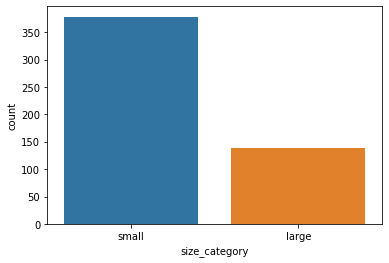

In [10]:
# Visualization for Categorical Variables
sns.countplot(x='size_category', data=data)
plt.show()

In [11]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

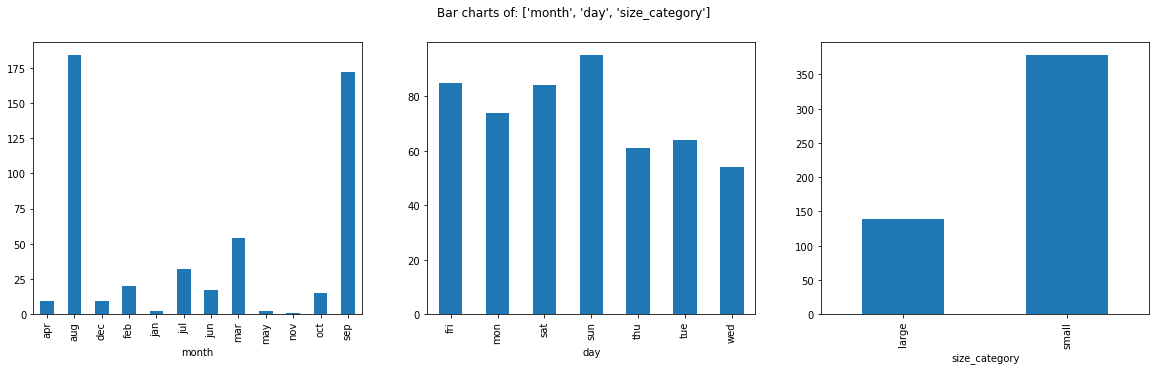

In [12]:
PlotBarCharts(inpData=data, 
              colsToPlot=['month', 'day', 'size_category'])

array([[<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>],
       [<AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>],
       [<AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'area'}>, <AxesSubplot:>]],
      dtype=object)

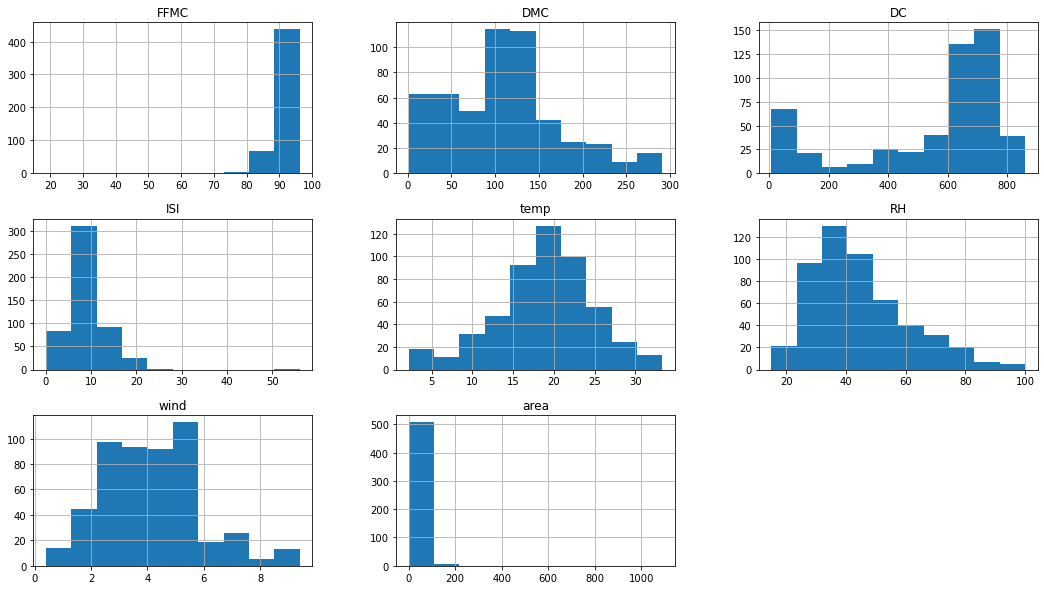

In [13]:
data.hist(['FFMC', 'DMC','DC','ISI','temp','RH','wind','area'], figsize=(18,10))

In [14]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

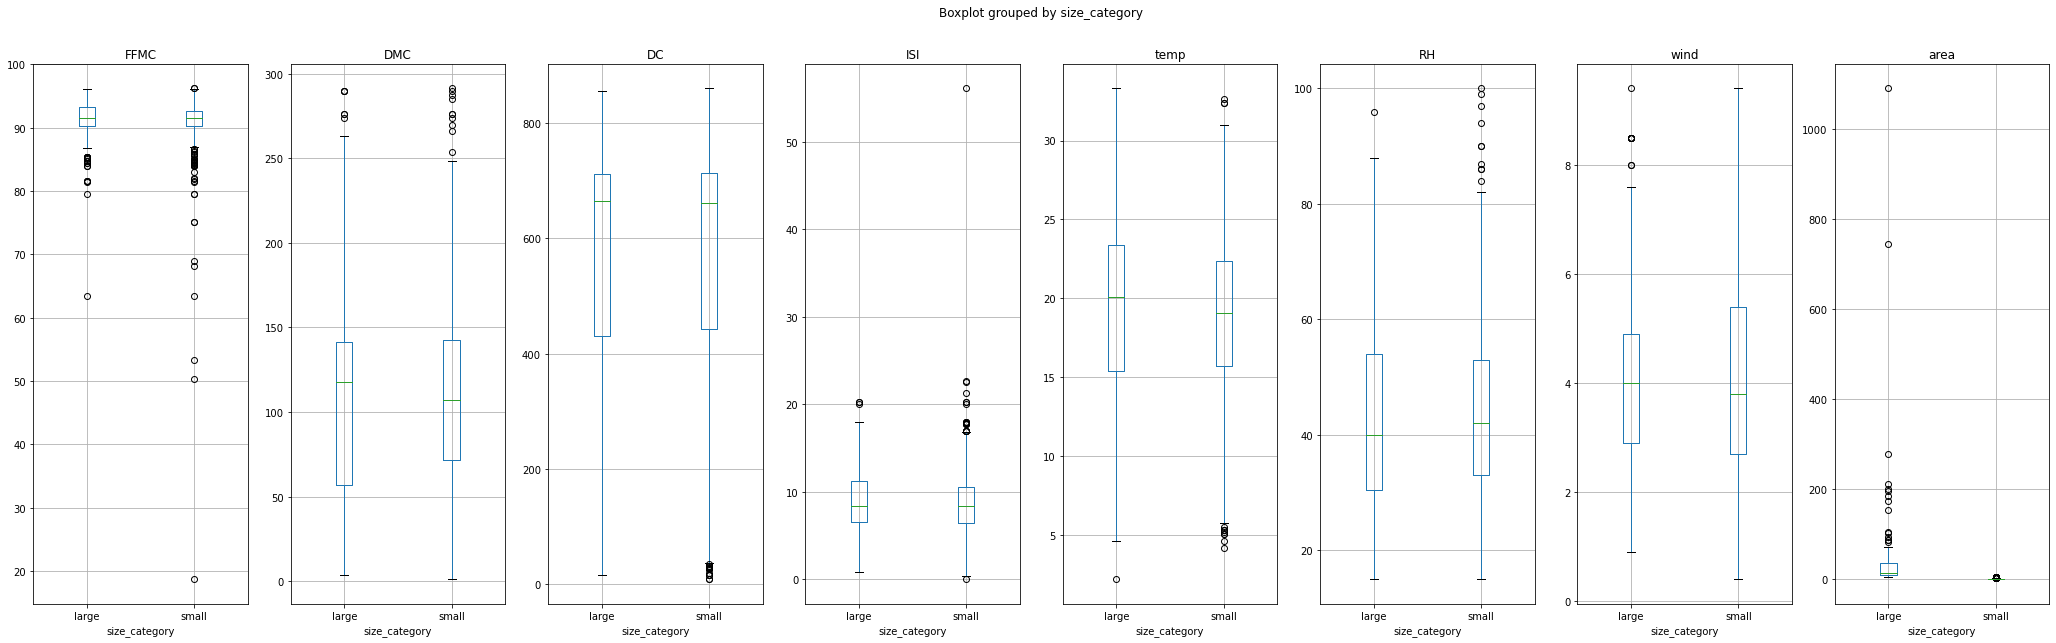

In [15]:
# Visualisation for Continuous Variables
ContinuousColsList=['FFMC', 'DMC','DC','ISI','temp','RH','wind','area']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(35,10))

# Creating box plots for each continuous predictor against the Target Variable "GoodCredit"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    data.boxplot(column=PredictorCol, by='size_category', figsize=(7,10), vert=True, ax=PlotCanvas[i])

In [16]:
# Finding Correlation using ANOVA
corr = data.corr(method='pearson')
print("Correlation of the Dataset:",corr)

Correlation of the Dataset:               FFMC       DMC        DC       ISI      temp        RH  \
FFMC      1.000000  0.382619  0.330512  0.531805  0.431532 -0.300995   
DMC       0.382619  1.000000  0.682192  0.305128  0.469594  0.073795   
DC        0.330512  0.682192  1.000000  0.229154  0.496208 -0.039192   
ISI       0.531805  0.305128  0.229154  1.000000  0.394287 -0.132517   
temp      0.431532  0.469594  0.496208  0.394287  1.000000 -0.527390   
RH       -0.300995  0.073795 -0.039192 -0.132517 -0.527390  1.000000   
wind     -0.028485 -0.105342 -0.203466  0.106826 -0.227116  0.069410   
rain      0.056702  0.074790  0.035861  0.067668  0.069491  0.099751   
area      0.040122  0.072994  0.049383  0.008258  0.097844 -0.075519   
dayfri    0.019306 -0.012010 -0.004220  0.046695 -0.071949  0.064506   
daymon   -0.059396 -0.107921 -0.052993 -0.158601 -0.136529  0.009376   
daysat   -0.019637 -0.003653 -0.035189 -0.038585  0.034899 -0.023869   
daysun   -0.089517  0.025355 -0.0014

Plotting correlation:


<AxesSubplot:>

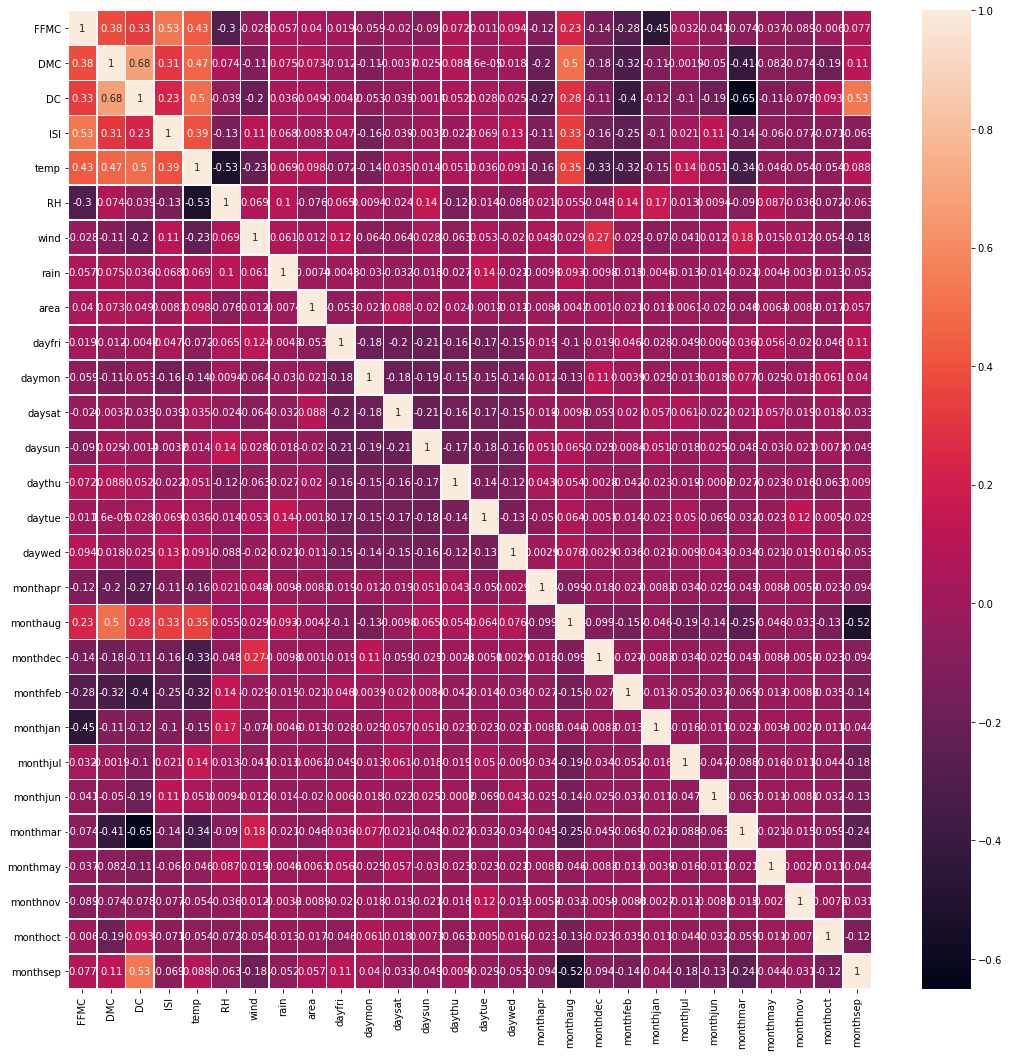

In [17]:
f,ax = plt.subplots(figsize=(18, 18))
print("Plotting correlation:")
sns.heatmap(corr,annot= True, linewidths=.5)

In [18]:
# Encoding the Category Columns
data['size_category'].replace({'small':1, 'large':0}, inplace=True)
data['month'].replace({'jan':1, 'feb':2,'mar':3, 'apr':4,'may':5, 'jun':6,'jul':7, 'aug':8,'sep':9, 'oct':10,'nov':11, 'dec':12}, inplace=True)
data['day'].replace({'sun':1, 'mon':2,'tue':3,'wed':4, 'thu':5,'fri':6, 'sat':7}, inplace=True)
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


In [19]:
# Defining X and Y
X = data.drop('size_category',axis=1)
y = data['size_category']

In [20]:
X.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0


In [21]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: size_category, dtype: int64

In [22]:
# Splitting data to training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [23]:
# Standarization of data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [25]:
# Linear Regression
print("Linear Regression")
Lreg = LinearRegression()
Lreg.fit(X_train,y_train)
prediction = Lreg.predict(X_test)
score = explained_variance_score(y_test, prediction)
mae = mean_absolute_error(prediction, y_test)

print("Score:", score)
print("Mean Absolute Error:", mae)

Linear Regression
Score: -7.812552467973675e+25
Mean Absolute Error: 312497735507.8199


In [26]:
# Lasso Regression
print("Lasso Regression")
lasso = Lasso()
lasso.fit(X_train,y_train)
prediction_lasso = lasso.predict(X_test)
score_lasso = explained_variance_score(y_test, prediction_lasso)
mae_lasso = mean_absolute_error(prediction_lasso, y_test)

print("Score:", score_lasso)
print("Mean Absolute Error:", mae_lasso)

Lasso Regression
Score: -2.220446049250313e-16
Mean Absolute Error: 0.39159386320051137


In [27]:
# Ridge Regression
print("Ridge Regression")
ridge = Ridge()
ridge.fit(X_train,y_train)
prediction_ridge = ridge.predict(X_test)
score_ridge = explained_variance_score(y_test, prediction_ridge)
mae_ridge = mean_absolute_error(prediction_ridge, y_test)

print("Score:", score_ridge)
print("Mean Absolute Error:", mae_ridge)

Ridge Regression
Score: 0.03744360191512919
Mean Absolute Error: 0.3561495908736809


In [28]:
# K-Neighbors Regressor
print('K-Neighbors Regressor')
knreg = KNeighborsRegressor()
knreg.fit(X_train,y_train)
prediction_knreg = knreg.predict(X_test)
score_kn = explained_variance_score(y_test, prediction_knreg)
mae_kn = mean_absolute_error(prediction_knreg, y_test)

print("Score:", score_kn)
print("Mean Absolute Error:", mae_kn)

K-Neighbors Regressor
Score: -0.1777476139978793
Mean Absolute Error: 0.3628205128205128


In [29]:
# Random Forest Regressor
print('Random Forest Regressor')
rfreg = RandomForestRegressor()
rfreg.fit(X_train,y_train)
prediction_rfreg = rfreg.predict(X_test)
score_rf = explained_variance_score(y_test, prediction_rfreg)
mae_rf = mean_absolute_error(prediction_rfreg, y_test)

print("Score:", score_rf)
print("Mean Absolute Error:", mae_rf)

Random Forest Regressor
Score: 0.9824815482502651
Mean Absolute Error: 0.004679487179487179


In [30]:
# Support Vector Regressor
print('Support Vector Regressor')
svr = SVR()
svr.fit(X_train,y_train)
prediction_svr = svr.predict(X_test)
score_svr = explained_variance_score(y_test, prediction_svr)
mae_svr = mean_absolute_error(prediction_svr, y_test)

print("Score:", score_svr)
print("Mean Absolute Error:", mae_svr)

Support Vector Regressor
Score: 0.24828359611111817
Mean Absolute Error: 0.27063133333700423


In [31]:
# Support Vector Classification
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)
prediction_svc = model.predict(X_test)
score_svc = model.score(X_test, y_test)
mae_svc = mean_absolute_error(prediction_svc, y_test)
print("Score:", score_svc)
print("Mean Absolute Error:", mae_svc)
cross_val_svc = cross_val_score(model, X_test, y_test, cv=2, scoring='accuracy')
print("Cross Value Validation Mean Score:",cross_val_svc.mean())

Score: 0.7628205128205128
Mean Absolute Error: 0.23717948717948717
Cross Value Validation Mean Score: 0.7371794871794872


In [32]:
# 1. Regularization C
model_c = SVC(C=10)
model_c.fit(X_train, y_train)
model_c.score(X_test, y_test)
prediction_svc_c = model_c.predict(X_test)
score_svc_c = model_c.score(X_test, y_test)
mae_svc_c = mean_absolute_error(prediction_svc_c, y_test)
print("Score:", score_svc_c)
print("Mean Absolute Error:", mae_svc_c)
cross_val_svc_c = cross_val_score(model_c, X_test, y_test, cv=2, scoring='accuracy')
print("Cross Value Validation Mean Score:",cross_val_svc_c.mean())

Score: 0.8397435897435898
Mean Absolute Error: 0.16025641025641027
Cross Value Validation Mean Score: 0.7371794871794872


              precision    recall  f1-score     support
0              0.766667  0.560976  0.647887   41.000000
1              0.857143  0.939130  0.896266  115.000000
accuracy       0.839744  0.839744  0.839744    0.839744
macro avg      0.811905  0.750053  0.772076  156.000000
weighted avg   0.833364  0.839744  0.830987  156.000000


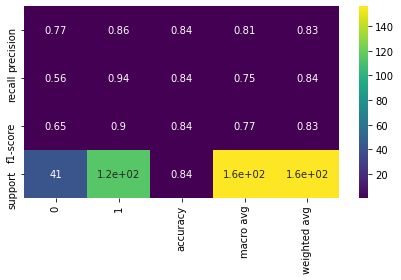

In [33]:
acc_score_svc_c = metrics.classification_report(y_test,prediction_svc_c,output_dict=True)
df_classification_report = pd.DataFrame(acc_score_svc_c)
print(df_classification_report.transpose())
fig, ax = plt.subplots()
sns.heatmap(df_classification_report,annot=True, cmap="viridis")
fig.tight_layout()
plt.show()

In [34]:
# 2. Linear Kernel
model_ke = SVC(kernel='linear')
model_ke.fit(X_train, y_train)
model_ke.score(X_test, y_test)
prediction_svc_ke = model_ke.predict(X_test)
score_svc_ke = model_ke.score(X_test, y_test)
mae_svc_ke = mean_absolute_error(prediction_svc_ke, y_test)
print("Score:", score_svc_ke)
print("Mean Absolute Error:", mae_svc_ke)
cross_val_svc_ke = cross_val_score(model_ke, X_test, y_test, cv=2, scoring='accuracy')
print("Cross Value Validation Mean Score:",cross_val_svc_ke.mean())

Score: 0.9230769230769231
Mean Absolute Error: 0.07692307692307693
Cross Value Validation Mean Score: 0.8717948717948718


              precision    recall  f1-score     support
0              1.000000  0.707317  0.828571   41.000000
1              0.905512  1.000000  0.950413  115.000000
accuracy       0.923077  0.923077  0.923077    0.923077
macro avg      0.952756  0.853659  0.889492  156.000000
weighted avg   0.930345  0.923077  0.918391  156.000000


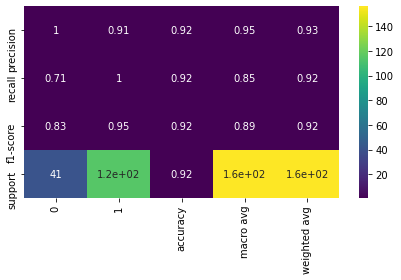

In [35]:
acc_score_svc_ke = metrics.classification_report(y_test,prediction_svc_ke,output_dict=True)
df_classification_report = pd.DataFrame(acc_score_svc_ke)
print(df_classification_report.transpose())
fig, ax = plt.subplots()
sns.heatmap(df_classification_report,annot=True, cmap="viridis")
fig.tight_layout()
plt.show()

In [36]:
# 3. Gamma
model_g = SVC(gamma=25)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)
prediction_svc_g = model_g.predict(X_test)
score_svc_g = model_g.score(X_test, y_test)
mae_svc_g = mean_absolute_error(prediction_svc_g, y_test)
print("Score:", score_svc_g)
print("Mean Absolute Error:", mae_svc_g)
cross_val_svc_g = cross_val_score(model_g, X_test, y_test, cv=2, scoring='accuracy')
print("Cross Value Validation Mean Score:",cross_val_svc_g.mean())

Score: 0.7564102564102564
Mean Absolute Error: 0.24358974358974358
Cross Value Validation Mean Score: 0.7371794871794872


              precision    recall  f1-score    support
0              0.800000  0.097561  0.173913   41.00000
1              0.754967  0.991304  0.857143  115.00000
accuracy       0.756410  0.756410  0.756410    0.75641
macro avg      0.777483  0.544433  0.515528  156.00000
weighted avg   0.766803  0.756410  0.677576  156.00000


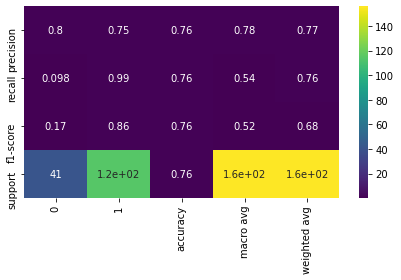

In [37]:
acc_score_svc_g = metrics.classification_report(y_test,prediction_svc_g,output_dict=True)
df_classification_report = pd.DataFrame(acc_score_svc_g)
print(df_classification_report.transpose())
fig, ax = plt.subplots()
sns.heatmap(df_classification_report,annot=True, cmap="viridis")
fig.tight_layout()
plt.show()

In [38]:
# 4. Gaussian Kernel
from sklearn import metrics
model_rb = SVC(kernel='rbf')
model_rb.fit(X_train, y_train)
model_rb.score(X_test, y_test)
prediction_svc_rb = model_rb.predict(X_test)
score_svc_rb = model_rb.score(X_test, y_test)
mae_svc_rb = mean_absolute_error(prediction_svc_rb, y_test)
print("Score:", score_svc_rb)
print("Mean Absolute Error:", mae_svc_rb)
cross_val_svc_rb = cross_val_score(model_rb, X_test, y_test, cv=2, scoring='accuracy')
print("Cross Value Validation Mean Score:",cross_val_svc_rb.mean())

Score: 0.7628205128205128
Mean Absolute Error: 0.23717948717948717
Cross Value Validation Mean Score: 0.7371794871794872


              precision    recall  f1-score     support
0              0.833333  0.121951  0.212766   41.000000
1              0.760000  0.991304  0.860377  115.000000
accuracy       0.762821  0.762821  0.762821    0.762821
macro avg      0.796667  0.556628  0.536572  156.000000
weighted avg   0.779274  0.762821  0.690172  156.000000


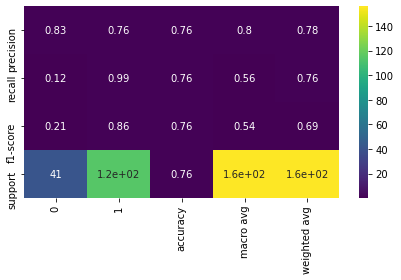

In [39]:
acc_score_svc_rb = metrics.classification_report(y_test,prediction_svc_rb,output_dict=True)
df_classification_report = pd.DataFrame(acc_score_svc_rb)
print(df_classification_report.transpose())
fig, ax = plt.subplots()
sns.heatmap(df_classification_report,annot=True, cmap="viridis")
fig.tight_layout()
plt.show()

In [40]:
# 5. Polynomial Kernel
model_po = SVC(kernel='poly', degree=15)
model_po.fit(X_train, y_train)
model_po.score(X_test, y_test)
prediction_svc_po = model_po.predict(X_test)
score_svc_po = model_po.score(X_test, y_test)
mae_svc_po = mean_absolute_error(prediction_svc_po, y_test)
print("Score:", score_svc_po)
print("Mean Absolute Error:", mae_svc_po)
cross_val_svc_po = cross_val_score(model_po, X_test, y_test, cv=2, scoring='accuracy')
print("Cross Value Validation Mean Score:",cross_val_svc_po.mean())

Score: 0.75
Mean Absolute Error: 0.25
Cross Value Validation Mean Score: 0.7371794871794872


              precision    recall  f1-score  support
0              0.625000  0.121951  0.204082    41.00
1              0.756757  0.973913  0.851711   115.00
accuracy       0.750000  0.750000  0.750000     0.75
macro avg      0.690878  0.547932  0.527896   156.00
weighted avg   0.722128  0.750000  0.681501   156.00


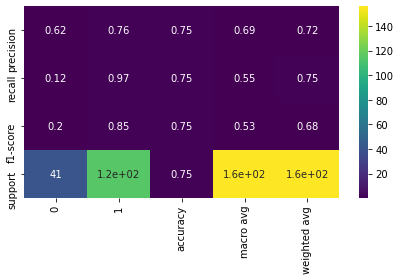

In [41]:
acc_score_svc_po = metrics.classification_report(y_test,prediction_svc_po,output_dict=True)
df_classification_report = pd.DataFrame(acc_score_svc_po)
print(df_classification_report.transpose())
fig, ax = plt.subplots()
sns.heatmap(df_classification_report,annot=True, cmap="viridis")
fig.tight_layout()
plt.show()

In [42]:
# 6. Sigmoid Kernel
model_sig = SVC(kernel='sigmoid')
model_sig.fit(X_train, y_train)
model_sig.score(X_test, y_test)
prediction_svc_sig = model_sig.predict(X_test)
score_svc_sig = model_sig.score(X_test, y_test)
mae_svc_sig = mean_absolute_error(prediction_svc_sig, y_test)
print("Score:", score_svc_sig)
print("Mean Absolute Error:", mae_svc_sig)
cross_val_svc_sig = cross_val_score(model_sig, X_test, y_test, cv=2, scoring='accuracy')
print("Cross Value Validation Mean Score:",cross_val_svc_sig.mean())

Score: 0.7564102564102564
Mean Absolute Error: 0.24358974358974358
Cross Value Validation Mean Score: 0.7435897435897436


              precision    recall  f1-score    support
0              0.800000  0.097561  0.173913   41.00000
1              0.754967  0.991304  0.857143  115.00000
accuracy       0.756410  0.756410  0.756410    0.75641
macro avg      0.777483  0.544433  0.515528  156.00000
weighted avg   0.766803  0.756410  0.677576  156.00000


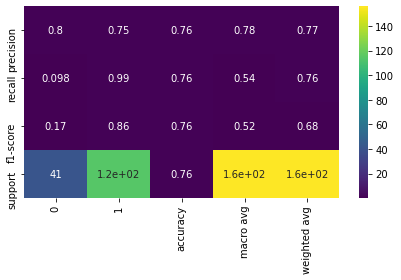

In [43]:
acc_score_svc_si = metrics.classification_report(y_test,prediction_svc_sig,output_dict=True)
df_classification_report = pd.DataFrame(acc_score_svc_si)
print(df_classification_report.transpose())
fig, ax = plt.subplots()
sns.heatmap(df_classification_report,annot=True, cmap="viridis")
fig.tight_layout()
plt.show()

In [44]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8)
X_train_os,y_train_os=ns.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({1: 263, 0: 98})
The number of classes after fit Counter({1: 122, 0: 98})


In [45]:
print(y_train.value_counts())
print('-------------------------------------------------------------')
print(y_train_os.value_counts())

1    263
0     98
Name: size_category, dtype: int64
-------------------------------------------------------------
1    122
0     98
Name: size_category, dtype: int64


[[ 41   0]
 [ 15 100]]
0.9038461538461539
              precision    recall  f1-score     support
0              0.732143  1.000000  0.845361   41.000000
1              1.000000  0.869565  0.930233  115.000000
accuracy       0.903846  0.903846  0.903846    0.903846
macro avg      0.866071  0.934783  0.887797  156.000000
weighted avg   0.929602  0.903846  0.907927  156.000000


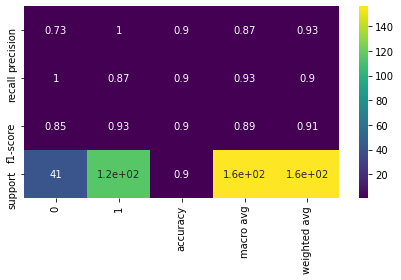

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
class_weight=dict({0:1,1:100})
classifier=RandomForestClassifier(class_weight=class_weight)
classifier.fit(X_train_os,y_train_os)
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
#print(classification_report(y_test,y_pred))
df_classification_report = pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))
print(df_classification_report.transpose())
fig, ax = plt.subplots()
sns.heatmap(df_classification_report,annot=True, cmap="viridis")
fig.tight_layout()
plt.show()

In [47]:
# OverSampling
from imblearn.over_sampling import RandomOverSampler
us=RandomOverSampler(0.75)
X_train_us,y_train_us=us.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_us)))

The number of classes before fit Counter({1: 263, 0: 98})
The number of classes after fit Counter({1: 263, 0: 197})


In [48]:
print(y_train.value_counts())
print('-------------------------------------------------------------')
print(y_train_us.value_counts())

1    263
0     98
Name: size_category, dtype: int64
-------------------------------------------------------------
1    263
0    197
Name: size_category, dtype: int64


[[ 41   0]
 [  1 114]]
0.9935897435897436
              precision    recall  f1-score    support
0              0.976190  1.000000  0.987952   41.00000
1              1.000000  0.991304  0.995633  115.00000
accuracy       0.993590  0.993590  0.993590    0.99359
macro avg      0.988095  0.995652  0.991792  156.00000
weighted avg   0.993742  0.993590  0.993614  156.00000


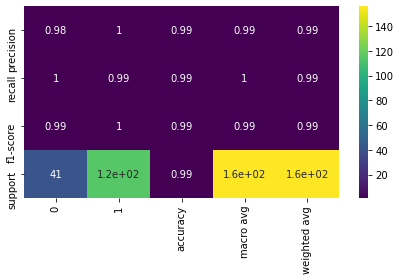

In [49]:
class_weight=dict({0:1,1:100})
classifier=RandomForestClassifier(class_weight=class_weight)
classifier.fit(X_train_us,y_train_us)
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
#print(classification_report(y_test,y_pred))
df_classification_report = pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))
print(df_classification_report.transpose())
fig, ax = plt.subplots()
sns.heatmap(df_classification_report,annot=True, cmap="viridis")
fig.tight_layout()
plt.show()

In [50]:
# SMOTETomek
from imblearn.combine import SMOTETomek
sm=SMOTETomek(0.75)
X_train_sm,y_train_sm=sm.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_sm)))

The number of classes before fit Counter({1: 263, 0: 98})
The number of classes after fit Counter({1: 247, 0: 181})


In [51]:
print(y_train.value_counts())
print('-------------------------------------------------------------')
print(y_train_us.value_counts())

1    263
0     98
Name: size_category, dtype: int64
-------------------------------------------------------------
1    263
0    197
Name: size_category, dtype: int64


[[ 41   0]
 [  3 112]]
0.9807692307692307
              precision    recall  f1-score     support
0              0.931818  1.000000  0.964706   41.000000
1              1.000000  0.973913  0.986784  115.000000
accuracy       0.980769  0.980769  0.980769    0.980769
macro avg      0.965909  0.986957  0.975745  156.000000
weighted avg   0.982080  0.980769  0.980982  156.000000


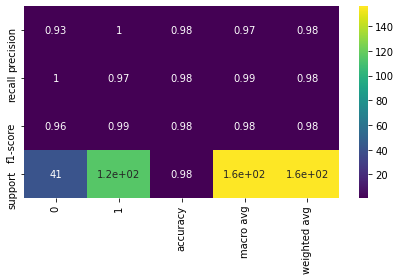

In [52]:
class_weight=dict({0:1,1:100})
classifier=RandomForestClassifier(class_weight=class_weight)
classifier.fit(X_train_sm,y_train_sm)
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
#print(classification_report(y_test,y_pred))
df_classification_report = pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))
print(df_classification_report.transpose())
fig, ax = plt.subplots()
sns.heatmap(df_classification_report,annot=True, cmap="viridis")
fig.tight_layout()
plt.show()

[[ 41   0]
 [  1 114]]
0.9935897435897436
              precision    recall  f1-score    support
0              0.976190  1.000000  0.987952   41.00000
1              1.000000  0.991304  0.995633  115.00000
accuracy       0.993590  0.993590  0.993590    0.99359
macro avg      0.988095  0.995652  0.991792  156.00000
weighted avg   0.993742  0.993590  0.993614  156.00000


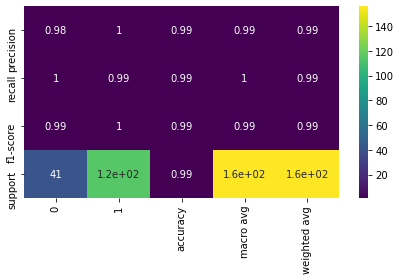

In [53]:
# Ensemble Technique
from imblearn.ensemble import EasyEnsembleClassifier
easy=EasyEnsembleClassifier()
easy.fit(X_train,y_train)
y_pred=easy.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
df_classification_report = pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))
print(df_classification_report.transpose())
fig, ax = plt.subplots()
sns.heatmap(df_classification_report,annot=True, cmap="viridis")
fig.tight_layout()
plt.show()

In [54]:
extraTreesRegressor = ExtraTreesRegressor()
rfe = RFE(extraTreesRegressor)
fit = rfe.fit(X_train,y_train)
y_pred=fit.predict(X_test)


print("The number of features:", fit.n_features_)
print("Selected Features:", fit.support_)
print("Feature Rankings:", fit.ranking_)
print(y_pred)

The number of features: 15
Selected Features: [False False  True  True  True  True  True  True  True False  True False
 False  True False  True  True  True False False  True False False  True
 False False False False False  True]
Feature Rankings: [ 3  2  1  1  1  1  1  1  1  8  1  7  5  1  6  1  1  1 11  4  1 12 14  1
 13 10 15 16  9  1]
[0.01 1.   1.   0.97 0.05 0.03 0.   1.   0.99 0.86 0.01 1.   1.   1.
 1.   0.   0.   1.   1.   1.   0.99 0.98 0.01 1.   1.   0.17 1.   0.98
 1.   0.99 1.   0.98 1.   0.   0.1  0.05 0.98 0.99 0.97 0.02 1.   0.02
 0.99 0.02 1.   0.99 0.8  0.   0.77 1.   1.   1.   0.05 1.   1.   1.
 0.02 0.   1.   0.9  0.   1.   1.   0.86 0.99 1.   1.   1.   0.98 0.03
 0.03 0.95 1.   0.08 1.   1.   1.   0.   0.   1.   1.   1.   1.   1.
 1.   0.99 1.   1.   0.99 1.   1.   0.96 0.81 1.   1.   1.   0.8  0.95
 0.02 0.01 1.   0.99 1.   1.   0.88 1.   1.   0.99 1.   1.   0.   0.97
 1.   0.01 0.99 0.01 1.   1.   0.99 1.   0.   0.   1.   0.98 1.   1.
 1.   0.07 0.99 0.51 0.87 1.